# Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.  
Choose features other than the ones used in the lesson.

In [86]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import sklearn.preprocessing

import Acquire

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Creating features for sepal area and petal area

In [41]:
df['petal_area'] = df.petal_length * df.petal_width
df['sepal_area'] = df.sepal_length * df.sepal_width

In [10]:
X = df[['sepal_width','sepal_length']]

# create object with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit to the features chosen
kmeans.fit(X)

# predict clusters 
kmeans.predict(X)

# add column in df of these cluster predictions
df['cluster'] = kmeans.predict(X)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


Visualize the results of your clustering.

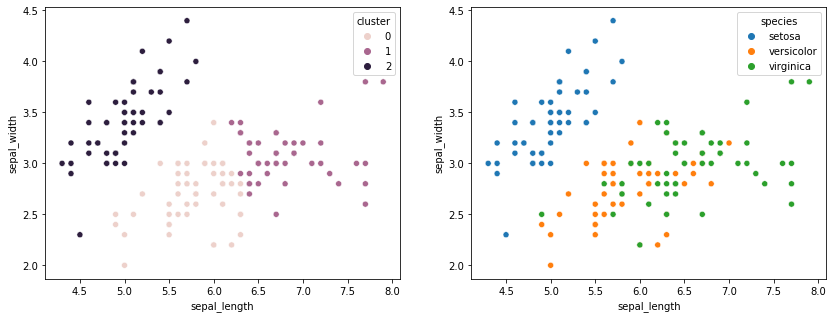

In [35]:
plt.figure(figsize=(14,5))

# Visualizing Clusters - don't know species
plt.subplot(121)
sns.scatterplot(x=df.sepal_length, y=df.sepal_width, hue=df.cluster)

# Visualizing Data by Species - to compare to clusters
plt.subplot(122)
sns.scatterplot(x=df.sepal_length, y=df.sepal_width, hue=df.species)

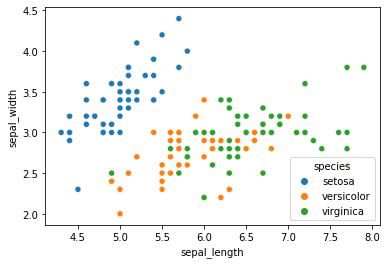

In [13]:
# Visualizing Data by Species - to compare to clusters
sns.scatterplot(x=df.sepal_length, y=df.sepal_width, hue=df.species)

Use the elbow method to visually select a good value for k.

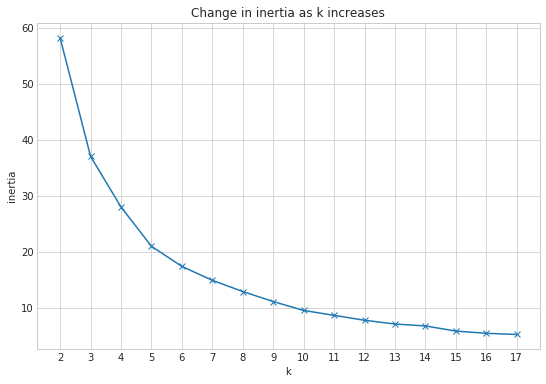

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [30]:
# Elbow seems to veer at around 4 - 5, we'll try 5

# create object with 9 clusters
kmeans2 = KMeans(n_clusters=5)

# fit to the features chosen
kmeans2.fit(X)

# predict clusters 
kmeans2.predict(X)

# add column in df of these cluster predictions
df['cluster_2'] = kmeans2.predict(X)

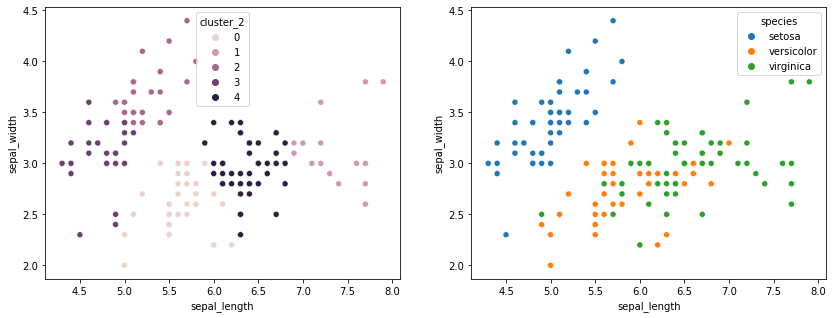

In [37]:
plt.figure(figsize=(14,5))

# Visualizing Clusters - don't know species
plt.subplot(121)
sns.scatterplot(x=df.sepal_length, y=df.sepal_width, hue=df.cluster_2)

# Visualizing Data by Species - to compare to clusters
plt.subplot(122)
sns.scatterplot(x=df.sepal_length, y=df.sepal_width, hue=df.species)

Repeat the clustering, this time with 3 different features.

In [39]:
X = df[['sepal_width','sepal_length','petal_area']]

# create object with 3 clusters
kmeans3 = KMeans(n_clusters=3)

# fit to the features chosen
kmeans3.fit(X)

# predict clusters 
kmeans3.predict(X)

# add column in df of these cluster predictions
df['cluster_3'] = kmeans3.predict(X)

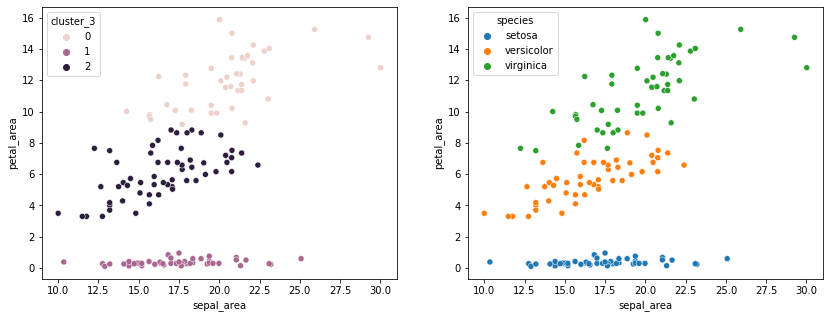

In [43]:
plt.figure(figsize=(14,5))

# Visualizing Clusters - don't know species
plt.subplot(121)
sns.scatterplot(x=df.sepal_area,y=df.petal_area, hue=df.cluster_3)

# Visualizing Data by Species - to compare to clusters
plt.subplot(122)
sns.scatterplot(x=df.sepal_area, y=df.petal_area, hue=df.species)

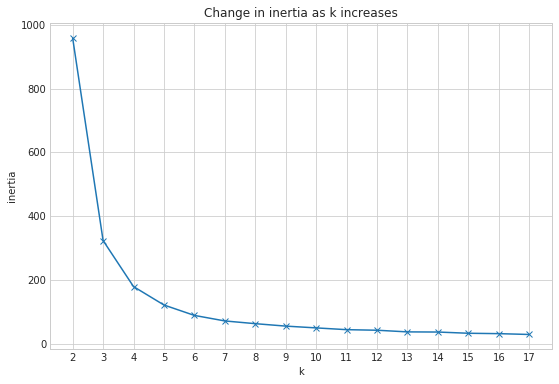

In [44]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [45]:
X = df[['sepal_width','sepal_length','petal_area']]

# create object with 3 clusters
kmeans4 = KMeans(n_clusters=4)

# fit to the features chosen
kmeans4.fit(X)

# predict clusters 
kmeans4.predict(X)

# add column in df of these cluster predictions
df['cluster_4'] = kmeans4.predict(X)

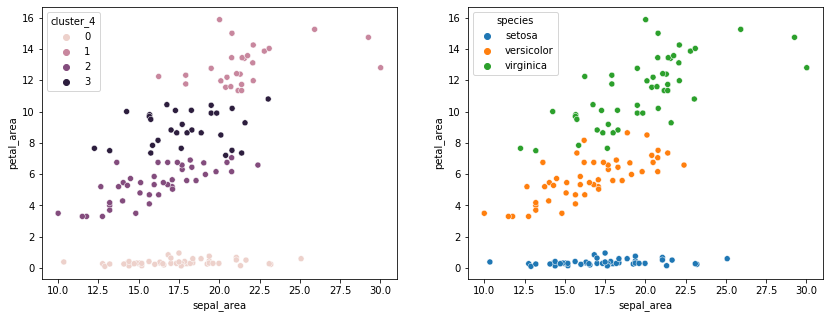

In [46]:
plt.figure(figsize=(14,5))

# Visualizing Clusters - don't know species
plt.subplot(121)
sns.scatterplot(x=df.sepal_area,y=df.petal_area, hue=df.cluster_4)

# Visualizing Data by Species - to compare to clusters
plt.subplot(122)
sns.scatterplot(x=df.sepal_area, y=df.petal_area, hue=df.species)

# Takeaways
- Adding an additional feature increased accuracy
- Clustering did best with the 3 features of sepal length and width, and the petal area
- Elbow method seemed like 4 would be a better option for k-means, but it did not make a big difference

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [48]:
mall = Acquire.get_mall_data()

In [84]:
Acquire.null_counts(mall)

,null_count,null_percentage
customer_id,0,0.0
is_female,0,0.0
age,0,0.0
annual_income,0,0.0
spending_score,0,0.0
cluster,0,0.0


In [52]:
mall.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Features
- gender - needs to be converted to 0, 1
- needs to be scaled on 2nd run
    - age
    - annual income
    - spending scores

In [ ]:
# replacing strings with boolean
mall = mall.replace({'Male':0, 'Female':1})

In [69]:
mall.rename(columns={'gender':'is_female'}, inplace=True)

In [81]:
X = mall[['is_female','age','spending_score']]

# create object with 3 clusters
kmeans = KMeans(n_clusters=5)

# fit to the features chosen
kmeans.fit(X)

# predict clusters 
kmeans.predict(X)

# add column in df of these cluster predictions
mall['cluster'] = kmeans.predict(X)

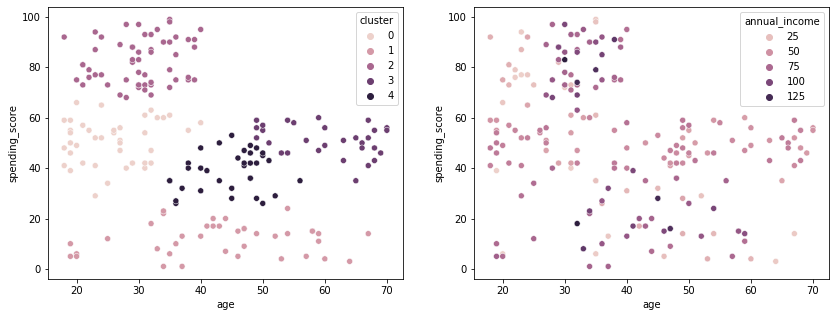

In [82]:
plt.figure(figsize=(14,5))

# Visualizing Clusters - don't know species
plt.subplot(121)
sns.scatterplot(x=mall.age, y=mall.spending_score, hue=mall.cluster)

# Visualizing Data by Species - to compare to clusters
plt.subplot(122)
sns.scatterplot(x=mall.age, y=mall.spending_score, hue=mall.annual_income)

How does scaling impact the results of clustering?

In [87]:
# 1. create the object - using mon max scalar
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object
scaler.fit(mall)

# 3. use the object
mall_scaled = scaler.transform(mall)

In [96]:
mall_scaled = pd.DataFrame(mall_scaled)
mall_scaled.index = mall.index
mall_scaled.columns = mall.columns

mall_scaled = mall_scaled.drop('cluster', axis=1)

In [97]:
X = mall_scaled[['is_female','age','spending_score']]

# create object with 3 clusters
kmeans = KMeans(n_clusters=5)

# fit to the features chosen
kmeans.fit(X)

# predict clusters 
kmeans.predict(X)

# add column in df of these cluster predictions
mall['cluster'] = kmeans.predict(X)

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

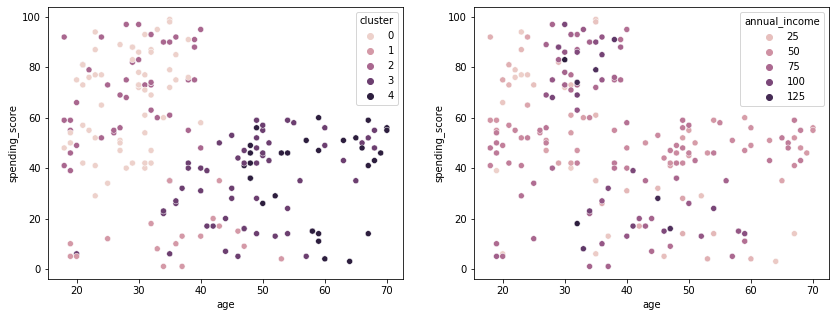

In [98]:
plt.figure(figsize=(14,5))

# Visualizing Clusters - don't know species
plt.subplot(121)
sns.scatterplot(x=mall.age, y=mall.spending_score, hue=mall.cluster)

# Visualizing Data by Species - to compare to clusters
plt.subplot(122)
sns.scatterplot(x=mall.age, y=mall.spending_score, hue=mall.annual_income)